In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import pickle

In [2]:
X_train = np.load(file='Data/Final/Time series/X_train.npy')

X_test = np.load(file='Data/Final/Time series/X_test.npy')

y_train = np.load(file='Data/Final/Time series/y_train.npy')

y_test = np.load(file='Data/Final/Time series/y_test.npy')

In [3]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((31313, 130, 1), (16857, 130, 1), (31313,), (16857,))

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [5]:
## Creating stacked LSTM model

model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(130,1)))
model.add(LSTM(30,return_sequences=True))
model.add(LSTM(30))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 130, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 130, 30)           9720      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 27,471
Trainable params: 27,471
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
490/490 [==============================] - 63s 128ms/step - loss: 0.0108 - val_loss: 0.0025
Epoch 2/20
490/490 [==============================] - 65s 134ms/step - loss: 0.0092 - val_loss: 0.0015
Epoch 3/20
490/490 [==============================] - 66s 135ms/step - loss: 0.0049 - val_loss: 3.3508e-04
Epoch 4/20
490/490 [==============================] - 70s 143ms/step - loss: 0.0024 - val_loss: 7.7343e-04
Epoch 5/20
490/490 [==============================] - 67s 137ms/step - loss: 0.0029 - val_loss: 1.8579e-04
Epoch 6/20
490/490 [==============================] - 68s 139ms/step - loss: 0.0020 - val_loss: 1.5991e-04
Epoch 7/20
490/490 [==============================] - 67s 138ms/step - loss: 0.0019 - val_loss: 1.2943e-04
Epoch 8/20
490/490 [==============================] - 67s 137ms/step - loss: 0.0019 - val_loss: 1.6987e-04
Epoch 9/20
490/490 [==============================] - 67s 137ms/step - loss: 0.0019 - val_loss: 1.4387e-04
Epoch 10/20
490/490 [========================

In [10]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [11]:
## Loading scaler

sc_X = pickle.load(open('Data/X_scaler.pkl', 'rb'))
sc_y= pickle.load(open('Data/y_scaler.pkl', 'rb'))

In [12]:
train_predict = sc_y.inverse_transform(train_predict)
test_predict = sc_y.inverse_transform(test_predict)

y_train = sc_y.inverse_transform(y_train.reshape(-1, 1))
y_test = sc_y.inverse_transform(y_test.reshape(-1, 1))

In [13]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [14]:
print('RMSE (train):',math.sqrt(mean_squared_error(y_train,train_predict)))
print('MAE (train):',mean_absolute_error(y_train,train_predict))

print('\nRMSE (test):',math.sqrt(mean_squared_error(y_test,test_predict)))
print('MAE (test):',mean_absolute_error(y_test,test_predict))

RMSE (train): 19.742744325899398
MAE (train): 7.121618789268637

RMSE (test): 5.53371097361133
MAE (test): 4.3472908873387475


In [15]:
print(r2_score(y_test,test_predict))

0.9619986870162478


In [19]:
print(r2_score(y_train,train_predict))

0.8737137658170189


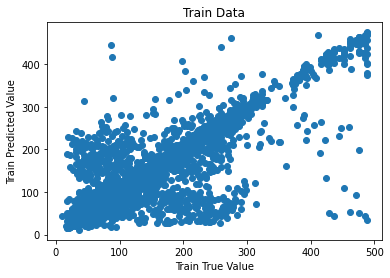

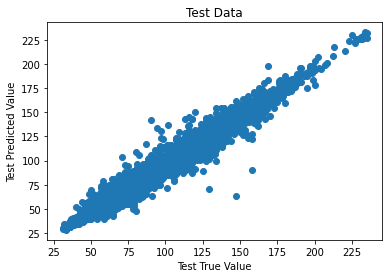

In [23]:
## Plotting the preds with true results

plt.scatter(y_train,train_predict)
plt.title('Train Data')
plt.xlabel('Train True Value')
plt.ylabel('Train Predicted Value')
plt.show()

plt.scatter(y_test,test_predict)
plt.title('Test Data')
plt.xlabel('Test True Value')
plt.ylabel('Test Predicted Value')
plt.show()

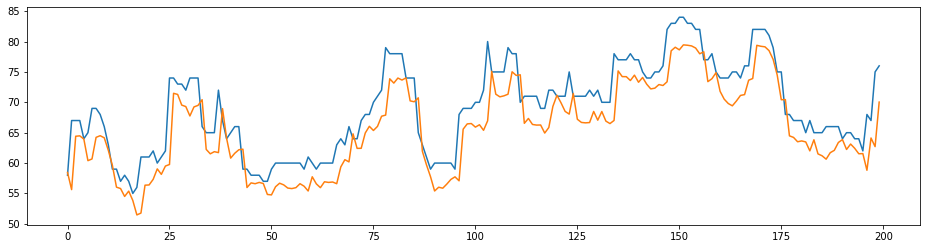

In [21]:
plt.figure(figsize=(16,4))
plt.plot(range(200),y_test[0:200])
plt.plot(range(200),test_predict[0:200])
plt.show()

In [25]:
model.save(filepath='Data/Models/lstm_regression.h5')